In [1]:
import pandas as pd
import numpy as np

In [2]:
crime = pd.read_csv('/Users/xueruobing/Documents/Courses/Data Engenieering Platforms/Final/Cleaned Data/Crimes2020_cleaned.csv', encoding = 'ISO-8859-1')

In [3]:
crime.head(10)

,CRIMEID,CASE NUMBER,DATE,BLOCK,PRIMARY TYPE,DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,DISTRICT,COMMUNITY AREA,LATITUDE,LONGITUDE,LOCATION
0,25603,JD423602,11/07/2020 07:40:00 PM,054XX W CORTEZ ST,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,15,25,41.899438,-87.762519,"(41.899437761, -87.762518782)"
1,25598,JD423611,11/07/2020 04:07:00 AM,021XX E 72ND PL,HOMICIDE,FIRST DEGREE MURDER,YARD,False,False,3,43,41.763456,-87.573332,"(41.763455518, -87.573332145)"
2,12178135,JD381686,09/27/2020 11:00:00 PM,068XX S RIDGELAND AVE,OTHER OFFENSE,OTHER CRIME AGAINST PERSON,APARTMENT,False,False,3,43,41.770931,-87.582581,"(41.770931406, -87.582580822)"
3,25600,JD424303,11/07/2020 06:20:00 PM,074XX N OAKLEY AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,24,2,42.016114,-87.687518,"(42.016113932, -87.687517771)"
4,25599,JD423568,11/07/2020 02:13:00 AM,059XX W HURON ST,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,15,25,41.892831,-87.773486,"(41.892831474, -87.773485904)"
5,12186164,JD390848,10/01/2020 07:30:00 AM,011XX S DELANO CT E,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE - PORCH / HALLWAY,False,False,1,32,41.868080,-87.632268,"(41.868079726, -87.632268373)"
6,12159178,JD360100,09/07/2020 10:25:00 PM,114XX S ABERDEEN ST,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,RESIDENCE,True,True,22,75,41.686188,-87.649484,"(41.686187514, -87.649483831)"
7,12149716,JD346514,08/26/2020 11:53:00 PM,038XX W 60TH PL,BATTERY,SIMPLE,RESIDENCE,True,False,8,65,41.783261,-87.719247,"(41.783261009, -87.719247274)"
8,12105734,JD296828,07/14/2020 01:00:00 AM,079XX S LAFLIN ST,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,APARTMENT,True,False,6,71,41.750154,-87.661009,"(41.750154295, -87.661008708)"
9,12065662,JD249792,06/01/2020 12:35:00 PM,085XX S PARNELL AVE,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,APARTMENT,True,False,6,71,41.739005,-87.637639,"(41.739005004, -87.637638525)"


In [4]:
counts = crime['CRIMEID'].groupby([crime['COMMUNITY AREA']]).count()
counts.head(5)

COMMUNITY AREA
1    2526
2    2354
3    2242
4    1429
5     832
Name: CRIMEID, dtype: int64

In [5]:
Poverty = pd.read_csv('/Users/xueruobing/Documents/Courses/Data Engenieering Platforms/Final/Cleaned Data/Povertyf.csv', encoding = 'ISO-8859-1')
Education = pd.read_csv('/Users/xueruobing/Documents/Courses/Data Engenieering Platforms/Final/Cleaned Data/Educationf.csv', encoding = 'ISO-8859-1')
Income = pd.read_csv('/Users/xueruobing/Documents/Courses/Data Engenieering Platforms/Final/Cleaned Data/Incomef.csv', encoding = 'ISO-8859-1')

In [6]:
Poverty.drop(Poverty.iloc[:, 0:1], inplace = True, axis = 1)
Education.drop(Education.iloc[:, 0:1], inplace = True, axis = 1)
Income.drop(Income.iloc[:, 0:1], inplace = True, axis = 1)

In [7]:
crimecount = pd.DataFrame([counts])
crimecountT = crimecount.T
crimecountT

,CRIMEID
COMMUNITY AREA,
1,2526
2,2354
3,2242
4,1429
5,832
...,...
73,2025
74,329
75,1269


In [8]:
table1=pd.merge(crimecountT,Poverty,left_on="COMMUNITY AREA",right_on="Community Number") 
table2=pd.merge(table1,Education,on = "Community Number",how = "right")
table3=pd.merge(table2,Income,on = "Community Number",how = "right")
table3.head(5)

,CRIMEID,Community Number,2000 %Poverty Population,2010 %Poverty Population,%Educated with no degree,%Educated with degree,"%Households Earning less than $49,999","%Households Earning 50,000_99,999","%Households Earning $100,000 or more"
0,2526,1,0.21,0.26,0.39,0.32,0.59,0.25,0.16
1,2354,2,0.14,0.17,0.39,0.28,0.54,0.28,0.18
2,2242,3,0.25,0.26,0.34,0.46,0.54,0.25,0.21
3,1429,4,0.11,0.12,0.32,0.47,0.41,0.35,0.24
4,832,5,0.09,0.07,0.21,0.54,0.27,0.29,0.44


In [9]:
table3 = table3.rename(columns={'CRIMEID': 'Community Area'})
table3 = table3.rename(columns={'Community Number': 'CRIMECOUNT'})
table3[['Community Area', 'CRIMECOUNT']] = table3[['CRIMECOUNT', 'Community Area']]
table3.head(5)

,Community Area,CRIMECOUNT,2000 %Poverty Population,2010 %Poverty Population,%Educated with no degree,%Educated with degree,"%Households Earning less than $49,999","%Households Earning 50,000_99,999","%Households Earning $100,000 or more"
0,1,2526,0.21,0.26,0.39,0.32,0.59,0.25,0.16
1,2,2354,0.14,0.17,0.39,0.28,0.54,0.28,0.18
2,3,2242,0.25,0.26,0.34,0.46,0.54,0.25,0.21
3,4,1429,0.11,0.12,0.32,0.47,0.41,0.35,0.24
4,5,832,0.09,0.07,0.21,0.54,0.27,0.29,0.44


In [10]:
data_analysis = table3.copy()

In [11]:
data_analysis = data_analysis.set_index('Community Area')
data_analysis.head(5)

,CRIMECOUNT,2000 %Poverty Population,2010 %Poverty Population,%Educated with no degree,%Educated with degree,"%Households Earning less than $49,999","%Households Earning 50,000_99,999","%Households Earning $100,000 or more"
Community Area,,,,,,,,
1,2526,0.21,0.26,0.39,0.32,0.59,0.25,0.16
2,2354,0.14,0.17,0.39,0.28,0.54,0.28,0.18
3,2242,0.25,0.26,0.34,0.46,0.54,0.25,0.21
4,1429,0.11,0.12,0.32,0.47,0.41,0.35,0.24
5,832,0.09,0.07,0.21,0.54,0.27,0.29,0.44


In [12]:
data_analysis.drop(data_analysis.iloc[:, 1:2], inplace = True, axis = 1)
data_analysis

,CRIMECOUNT,2010 %Poverty Population,%Educated with no degree,%Educated with degree,"%Households Earning less than $49,999","%Households Earning 50,000_99,999","%Households Earning $100,000 or more"
Community Area,,,,,,,
1,2526,0.26,0.39,0.32,0.59,0.25,0.16
2,2354,0.17,0.39,0.28,0.54,0.28,0.18
3,2242,0.26,0.34,0.46,0.54,0.25,0.21
4,1429,0.12,0.32,0.47,0.41,0.35,0.24
5,832,0.07,0.21,0.54,0.27,0.29,0.44
...,...,...,...,...,...,...,...
73,2025,0.19,0.49,0.16,0.60,0.27,0.13
74,329,0.03,0.40,0.26,0.23,0.36,0.41
75,1269,0.14,0.42,0.29,0.42,0.30,0.28


In [13]:
data_analysis.dtypes

CRIMECOUNT                                 int64
2010 %Poverty Population                 float64
%Educated with no degree                 float64
%Educated with degree                    float64
%Households Earning less than $49,999    float64
%Households Earning 50,000_99,999        float64
%Households Earning $100,000 or more     float64
dtype: object

Text(0.5, 1.0, 'elbow plot')

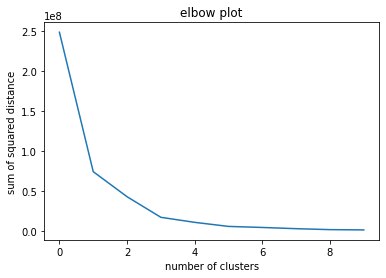

In [14]:
# K-means approach
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
el = []
for i in range(1,11):
    KM = KMeans(n_clusters = i)
    KM.fit(data_analysis)
    el.append(KM.inertia_)

plt.plot(el)
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distance')
plt.title('elbow plot')

In [15]:
# apply the kmeans model
KM = KMeans(n_clusters = 3)
P = KM.fit_predict(data_analysis)

In [16]:
# counts of each group
a = len(data_analysis.iloc[P==2,0])
b = len(data_analysis.iloc[P==1,0])
c = len(data_analysis.iloc[P==0,0])

print('group1:',a)
print('group2:',b)
print('group3:',c)


group1: 18
group2: 14
group3: 45


In [17]:
group1=data_analysis.iloc[P==2,0]
group2=data_analysis.iloc[P==1,0]
group3=data_analysis.iloc[P==0,0]

In [18]:
group12 = pd.DataFrame([group1])
group12=group12.T
group12['group_number']='1'
group12

,CRIMECOUNT,group_number
Community Area,,
1,2526,1
2,2354,1
3,2242,1
6,3216,1
7,2077,1
15,1939,1
19,2891,1
22,2868,1
26,3865,1


In [19]:
group22 = pd.DataFrame([group2])
group22=group22.T
group22['group_number']='2'
group22

,CRIMECOUNT,group_number
Community Area,,
8,5736,2
23,5309,2
24,4031,2
25,9965,2
28,4995,2
29,5573,2
32,4131,2
43,6118,2
44,4328,2


In [20]:
group32 = pd.DataFrame([group3])
group32=group32.T
group32['group_number']='3'
group32

,CRIMECOUNT,group_number
Community Area,,
4,1429,3
5,832,3
9,154,3
10,673,3
11,674,3
12,360,3
13,574,3
14,1579,3
16,1666,3


In [21]:
list=[group12,group22,group32]
groups=pd.concat(list,axis=0)
groups=pd.DataFrame(groups)
groups

,CRIMECOUNT,group_number
Community Area,,
1,2526,1
2,2354,1
3,2242,1
6,3216,1
7,2077,1
...,...,...
72,571,3
74,329,3
75,1269,3


In [22]:
groups.dtypes
groups['group_number'] = groups['group_number'].apply(pd.to_numeric, errors = 'coerce')
groups.dtypes

CRIMECOUNT      int64
group_number    int64
dtype: object

In [23]:
table4=pd.merge(groups,data_analysis,on = "Community Area",how = "right")
table4.drop(table4.iloc[:, 2:3], inplace = True, axis = 1)
table4 = table4.rename(columns={'CRIMECOUNT_x': 'CRIMECOUNT'})
table4

,CRIMECOUNT,group_number,2010 %Poverty Population,%Educated with no degree,%Educated with degree,"%Households Earning less than $49,999","%Households Earning 50,000_99,999","%Households Earning $100,000 or more"
Community Area,,,,,,,,
1,2526,1,0.26,0.39,0.32,0.59,0.25,0.16
2,2354,1,0.17,0.39,0.28,0.54,0.28,0.18
3,2242,1,0.26,0.34,0.46,0.54,0.25,0.21
4,1429,3,0.12,0.32,0.47,0.41,0.35,0.24
5,832,3,0.07,0.21,0.54,0.27,0.29,0.44
...,...,...,...,...,...,...,...,...
73,2025,1,0.19,0.49,0.16,0.60,0.27,0.13
74,329,3,0.03,0.40,0.26,0.23,0.36,0.41
75,1269,3,0.14,0.42,0.29,0.42,0.30,0.28


In [24]:
table4.to_csv('/Users/xueruobing/Documents/Courses/Data Engenieering Platforms/Final/Cleaned Data/Demoanalysisnew.csv')

Text(0, 0.5, '2010 %Poverty Population')

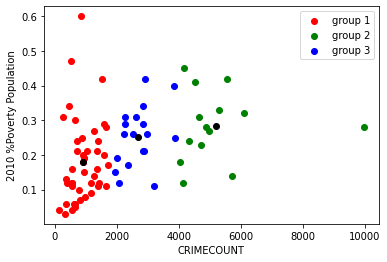

In [25]:
# plot the relationship between CRIMECOUNT and 2010% Poverty Population
plt.scatter(data_analysis.iloc[P==0,0],data_analysis.iloc[P==0,1],label = 'group 1',color = 'red')
plt.scatter(data_analysis.iloc[P==1,0],data_analysis.iloc[P==1,1],label = 'group 2',color = 'green')
plt.scatter(data_analysis.iloc[P==2,0],data_analysis.iloc[P==2,1],label = 'group 3',color = 'blue')

plt.legend()
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1], color = 'black')
plt.xlabel('CRIMECOUNT')
plt.ylabel('2010 %Poverty Population')

Text(0, 0.5, '%Educated with no degree')

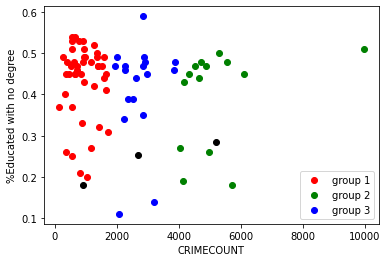

In [26]:
# plot the relationship between CRIMECOUNT and %Educated with no degree
plt.scatter(data_analysis.iloc[P==0,0],data_analysis.iloc[P==0,2],label = 'group 1',color = 'red')
plt.scatter(data_analysis.iloc[P==1,0],data_analysis.iloc[P==1,2],label = 'group 2',color = 'green')
plt.scatter(data_analysis.iloc[P==2,0],data_analysis.iloc[P==2,2],label = 'group 3',color = 'blue')

plt.legend()
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1], color = 'black')
plt.xlabel('CRIMECOUNT')
plt.ylabel('%Educated with no degree')

Text(0, 0.5, '%Educated with degree')

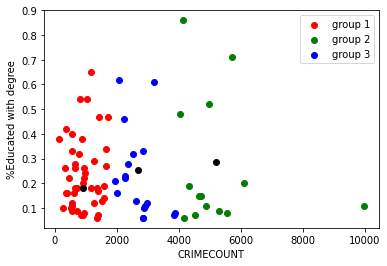

In [27]:
# plot the relationship between CRIMECOUNT and %Educated with degree
plt.scatter(data_analysis.iloc[P==0,0],data_analysis.iloc[P==0,3],label = 'group 1',color = 'red')
plt.scatter(data_analysis.iloc[P==1,0],data_analysis.iloc[P==1,3],label = 'group 2',color = 'green')
plt.scatter(data_analysis.iloc[P==2,0],data_analysis.iloc[P==2,3],label = 'group 3',color = 'blue')

plt.legend()
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1], color = 'black')
plt.xlabel('CRIMECOUNT')
plt.ylabel('%Educated with degree')

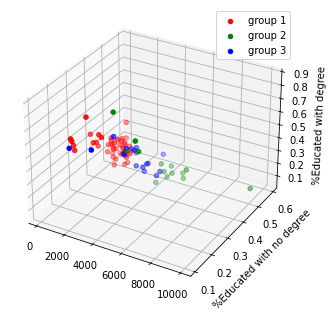

In [28]:
# recency, frequency and money
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_analysis.iloc[P==0,0],data_analysis.iloc[P==0,2],data_analysis.iloc[P==0,3],label = 'group 1',color = 'red')
ax.scatter(data_analysis.iloc[P==1,0],data_analysis.iloc[P==1,2],data_analysis.iloc[P==1,3],label = 'group 2',color = 'green')
ax.scatter(data_analysis.iloc[P==2,0],data_analysis.iloc[P==2,2],data_analysis.iloc[P==2,3],label = 'group 3',color = 'blue')

ax.set_ylabel('%Educated with no degree')
ax.set_zlabel('%Educated with degree')
plt.legend()

Text(0, 0.5, '%Households Earning less than $49,999')

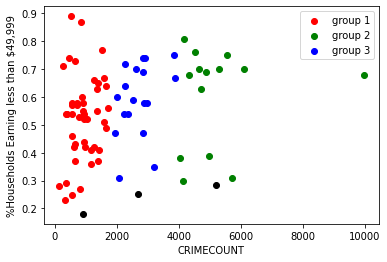

In [29]:
# plot the relationship between CRIMECOUNT and %Households Earning less than $49,999
plt.scatter(data_analysis.iloc[P==0,0],data_analysis.iloc[P==0,4],label = 'group 1',color = 'red')
plt.scatter(data_analysis.iloc[P==1,0],data_analysis.iloc[P==1,4],label = 'group 2',color = 'green')
plt.scatter(data_analysis.iloc[P==2,0],data_analysis.iloc[P==2,4],label = 'group 3',color = 'blue')

plt.legend()
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1], color = 'black')
plt.xlabel('CRIMECOUNT')
plt.ylabel('%Households Earning less than $49,999')

Text(0, 0.5, '%Households Earning 50,000_99,999')

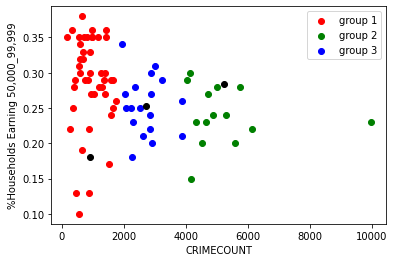

In [30]:
# plot the relationship between CRIMECOUNT and %Households Earning 50,000_99,999
plt.scatter(data_analysis.iloc[P==0,0],data_analysis.iloc[P==0,5],label = 'group 1',color = 'red')
plt.scatter(data_analysis.iloc[P==1,0],data_analysis.iloc[P==1,5],label = 'group 2',color = 'green')
plt.scatter(data_analysis.iloc[P==2,0],data_analysis.iloc[P==2,5],label = 'group 3',color = 'blue')

plt.legend()
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1], color = 'black')
plt.xlabel('CRIMECOUNT')
plt.ylabel('%Households Earning 50,000_99,999')

Text(0, 0.5, '%Households Earning $100,000 or more')

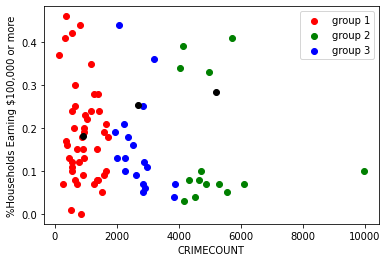

In [31]:
# plot the relationship between CRIMECOUNT and %Households Earning $100,000 or more
plt.scatter(data_analysis.iloc[P==0,0],data_analysis.iloc[P==0,6],label = 'group 1',color = 'red')
plt.scatter(data_analysis.iloc[P==1,0],data_analysis.iloc[P==1,6],label = 'group 2',color = 'green')
plt.scatter(data_analysis.iloc[P==2,0],data_analysis.iloc[P==2,6],label = 'group 3',color = 'blue')

plt.legend()
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1], color = 'black')
plt.xlabel('CRIMECOUNT')
plt.ylabel('%Households Earning $100,000 or more')